In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec

In [158]:
# Using /n to separate by sentences
df = pd.read_csv('quijote.txt', sep='/n', header=None, engine='python')

df.head(30)

,0
0,TASA
1,"Yo, Juan Gallo de Andrada, escribano de Cámara..."
2,Juan Gallo de Andrada.
3,TESTIMONIO DE LAS ERRATAS
4,Este libro no tiene cosa digna que no correspo...
5,El licenciado Francisco Murcia de la Llana.
6,EL REY
7,"Por cuanto por parte de vos, Miguel de Cervant..."
8,"YO, EL REY."
9,Por mandado del Rey nuestro señor:


In [159]:
print("Total sentences:", df.shape[0])

Total sentences: 6239


# Pre-processing

In [160]:
from keras.preprocessing.text import text_to_word_sequence
import unicodedata
import re

pattern = r'[^a-zA-z0-9.,!?/:;\"\'\s]'

sentence_tokens = []
for _, row in df[:None].iterrows():
    ttw = text_to_word_sequence(row[0])
    ttw_processed = []
    for word in ttw:
        word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        word = re.sub(pattern, '', word)
        ttw_processed.append(word)
    sentence_tokens.append(ttw_processed)

In [161]:
sentence_tokens[:2]

[['tasa'],
 ['yo',
  'juan',
  'gallo',
  'de',
  'andrada',
  'escribano',
  'de',
  'camara',
  'del',
  'rey',
  'nuestro',
  'senor',
  'de',
  'los',
  'que',
  'residen',
  'en',
  'su',
  'consejo',
  'certifico',
  'y',
  'doy',
  'fe',
  'que',
  'habiendo',
  'visto',
  'por',
  'los',
  'senores',
  'del',
  'un',
  'libro',
  'intitulado',
  'el',
  'ingenioso',
  'hidalgo',
  'de',
  'la',
  'mancha',
  'compuesto',
  'por',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'tasaron',
  'cada',
  'pliego',
  'del',
  'dicho',
  'libro',
  'a',
  'tres',
  'maravedis',
  'y',
  'medio',
  'el',
  'cual',
  'tiene',
  'ochenta',
  'y',
  'tres',
  'pliegos',
  'que',
  'al',
  'dicho',
  'precio',
  'monta',
  'el',
  'dicho',
  'libro',
  'docientos',
  'y',
  'noventa',
  'maravedis',
  'y',
  'medio',
  'en',
  'que',
  'se',
  'ha',
  'de',
  'vender',
  'en',
  'papel',
  'y',
  'dieron',
  'licencia',
  'para',
  'que',
  'a',
  'este',
  'precio',
  'se',
  'pueda',


# Creating vectors

In [162]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [163]:
w2v_model = Word2Vec(min_count=5,
                     window=2,
                     vector_size=300,
                     negative=20,
                     workers=1,
                     sg=1)

In [164]:
w2v_model.build_vocab(sentence_tokens)

In [165]:
print("Corpus size:", w2v_model.corpus_count)

Corpus size: 6239


In [166]:
print("Total distinct words:", len(w2v_model.wv.index_to_key))

Total distinct words: 5270


# Training

In [167]:
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=50,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 2797441.0
Loss after epoch 1: 2029376.5
Loss after epoch 2: 1927314.5
Loss after epoch 3: 1901298.0
Loss after epoch 4: 1820306.0
Loss after epoch 5: 1801805.0
Loss after epoch 6: 1779064.0
Loss after epoch 7: 1769236.0
Loss after epoch 8: 1721619.0
Loss after epoch 9: 1682888.0
Loss after epoch 10: 1656132.0
Loss after epoch 11: 1644814.0
Loss after epoch 12: 1622456.0
Loss after epoch 13: 1610752.0
Loss after epoch 14: 1596522.0
Loss after epoch 15: 1577956.0
Loss after epoch 16: 1569074.0
Loss after epoch 17: 1555014.0
Loss after epoch 18: 1537712.0
Loss after epoch 19: 1530152.0
Loss after epoch 20: 1509544.0
Loss after epoch 21: 1492688.0
Loss after epoch 22: 1480116.0
Loss after epoch 23: 1467760.0
Loss after epoch 24: 1457620.0
Loss after epoch 25: 1444732.0
Loss after epoch 26: 1431120.0
Loss after epoch 27: 1419252.0
Loss after epoch 28: 1420332.0
Loss after epoch 29: 1408812.0
Loss after epoch 30: 1402736.0
Loss after epoch 31: 1392708.0
Loss after epoch 3

(11824778, 19214900)

# Testing results

In [168]:
w2v_model.wv.most_similar(positive=["quijote"], topn=10)

[('don', 0.6614277958869934),
 ('jeronimo', 0.4391803741455078),
 ('gaspar', 0.39551764726638794),
 ('tarfe', 0.3878575265407562),
 ('tracia', 0.38346076011657715),
 ('cirongilio', 0.365409791469574),
 ('malparado', 0.3634378910064697),
 ('luis', 0.36277422308921814),
 ('abrazandole', 0.3600510060787201),
 ('intitulado', 0.35643506050109863)]

In [169]:
w2v_model.wv.most_similar(positive=["sancho"], topn=10)

[('panza', 0.4567840099334717),
 ('decid', 0.4219357669353485),
 ('ta', 0.39664226770401),
 ('ambrosio', 0.39615827798843384),
 ('estemos', 0.39490488171577454),
 ('replicar', 0.3837305009365082),
 ('jeronimo', 0.375296950340271),
 ('hicieronlo', 0.37310755252838135),
 ('majadero', 0.36579030752182007),
 ('digote', 0.36511582136154175)]

In [170]:
w2v_model.wv.most_similar(positive=["cervantes"], topn=10)

[('miguel', 0.7570977210998535),
 ('saavedra', 0.744672417640686),
 ('intitulado', 0.6138710379600525),
 ('fecha', 0.508773684501648),
 ('compuesto', 0.4809699058532715),
 ('pliego', 0.47030332684516907),
 ('andurriales', 0.4691762924194336),
 ('garcia', 0.4678325057029724),
 ('espanol', 0.463644802570343),
 ('perez', 0.44737955927848816)]

In [171]:
w2v_model.wv.most_similar(positive=["caballero"], topn=10)

[('andante', 0.4491423964500427),
 ('hidalgo', 0.38160228729248047),
 ('aventurero', 0.3772469758987427),
 ('toro', 0.3710313141345978),
 ('felixmarte', 0.3675742745399475),
 ('pierres', 0.36494895815849304),
 ('leal', 0.3645140528678894),
 ('embajador', 0.346611350774765),
 ('procurase', 0.3448006808757782),
 ('hircania', 0.3445601761341095)]

In [172]:
w2v_model.wv.most_similar(positive=["gigantes"], topn=10)

[('follones', 0.5084276795387268),
 ('molinos', 0.43988367915153503),
 ('vestiglos', 0.4385627806186676),
 ('escuderos', 0.4292663633823395),
 ('acostumbrados', 0.42852410674095154),
 ('presentados', 0.42534276843070984),
 ('malandrines', 0.42344537377357483),
 ('desaforados', 0.4215196371078491),
 ('bravos', 0.42080119252204895),
 ('perezosos', 0.4097270667552948)]

In [173]:
w2v_model.wv.most_similar(positive=["rocinante"], topn=10)

[('cabestro', 0.4269150495529175),
 ('seguiale', 0.3851966857910156),
 ('riendas', 0.3840424716472626),
 ('atravesado', 0.37402328848838806),
 ('arzon', 0.3675335943698883),
 ('rienda', 0.3636254072189331),
 ('abrazandole', 0.35921043157577515),
 ('estribo', 0.35829535126686096),
 ('embrazo', 0.3574920892715454),
 ('pollina', 0.3563278913497925)]

In [174]:
from sklearn.metrics import pairwise

def plot_matrix_distance(words, dist):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot()
    sns.heatmap(dist, xticklabels=words, yticklabels=words, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
    plt.show()

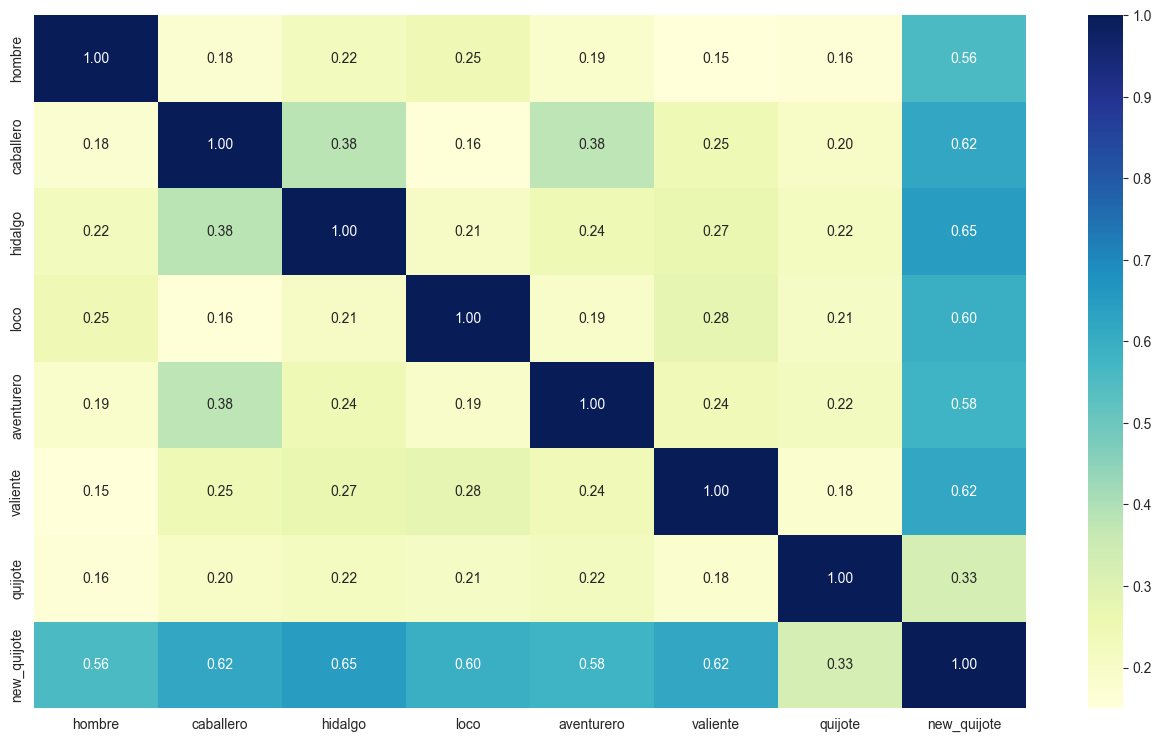

In [175]:
test_words = ['hombre', 'caballero', 'hidalgo', 'loco', 'aventurero', 'valiente','quijote']
test_emb = [w2v_model.wv[w] for w in test_words]

new_quijote = test_emb[0] + test_emb[1] + test_emb[2] + test_emb[3] + test_emb[4] + test_emb[5]

new_words = test_words + ['new_quijote']
new_emb = np.append(test_emb, new_quijote.reshape(1, -1), axis=0)

dist = pairwise.cosine_similarity(new_emb, new_emb)

plot_matrix_distance(new_words, dist)

In [176]:
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model):
    num_dimensions = 2

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [177]:
import plotly.express as px

x_vals, y_vals, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=x_vals[:MAX_WORDS], y=y_vals[:MAX_WORDS], text=labels[:MAX_WORDS])
fig.show()

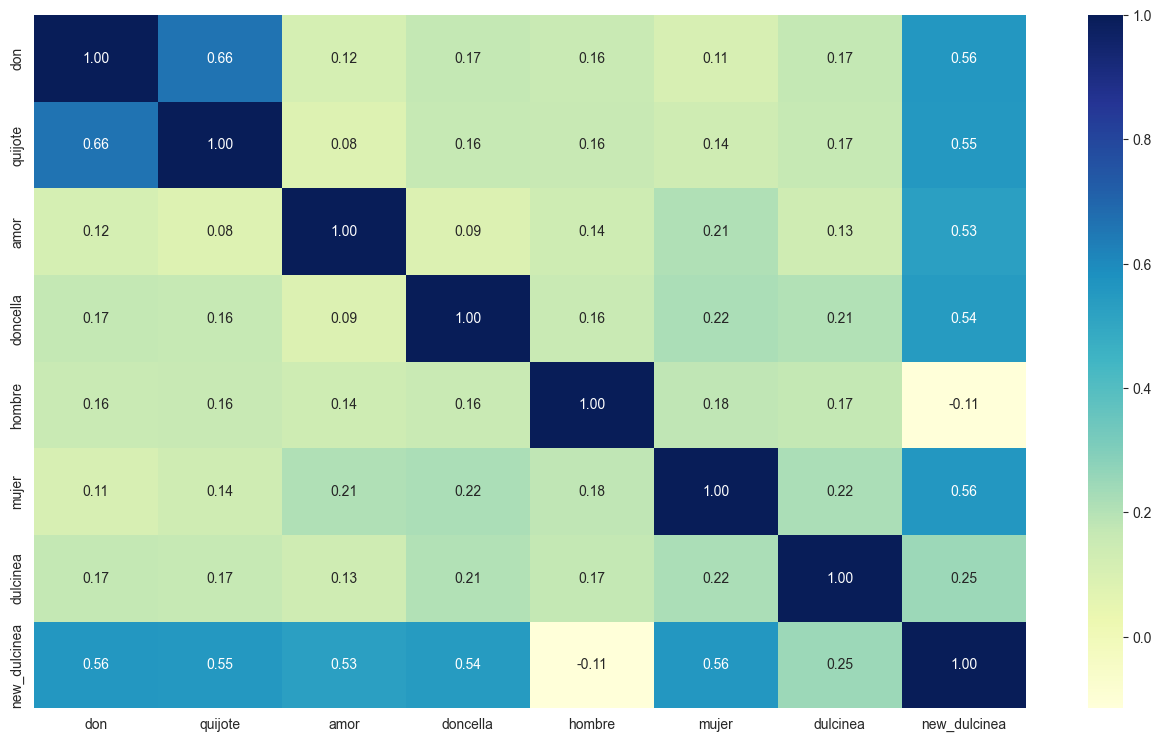

In [178]:
test_words = ['don', 'quijote', 'amor', 'doncella', 'hombre', 'mujer', 'dulcinea']
test_emb = [w2v_model.wv[w] for w in test_words]

new_dulcinea = test_emb[0] + test_emb[1] + test_emb[2] + test_emb[3] - test_emb[4] + test_emb[5]

new_words = test_words + ['new_dulcinea']
new_emb = np.append(test_emb, new_dulcinea.reshape(1, -1), axis=0)

dist = pairwise.cosine_similarity(new_emb, new_emb)

plot_matrix_distance(new_words, dist)

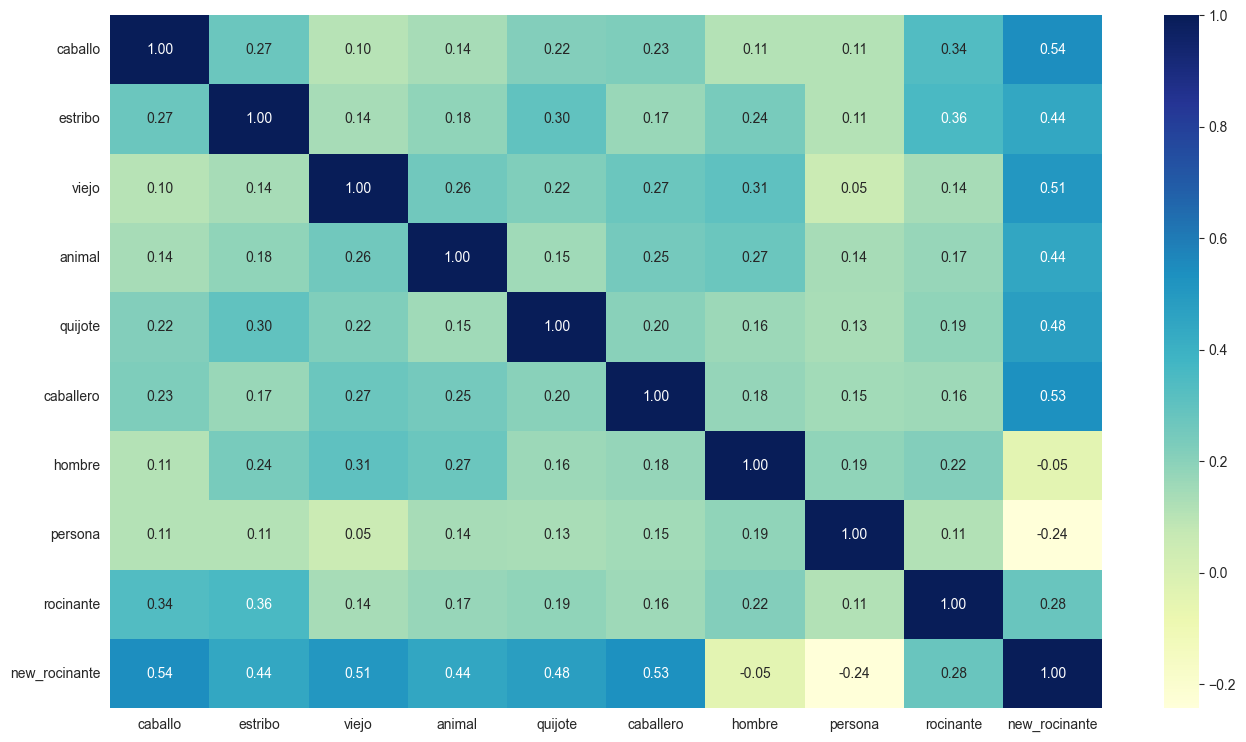

In [179]:
fig.show()
test_words = ['caballo', 'estribo', 'viejo', 'animal', 'quijote', 'caballero', 'hombre', 'persona', 'rocinante']
test_emb = [w2v_model.wv[w] for w in test_words]

new_rocinante = test_emb[0] + test_emb[1] + test_emb[2] + test_emb[3] + test_emb[4] + test_emb[5] - test_emb[6] - test_emb[7]

new_words = test_words + ['new_rocinante']
new_emb = np.append(test_emb, new_rocinante.reshape(1, -1), axis=0)

dist = pairwise.cosine_similarity(new_emb, new_emb)

plot_matrix_distance(new_words, dist)